# TPC Digitized Data Exploration

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16

from readdata import get_data
from tpcplot import draw_g4xyz
from tracklen import process_track, plot_dedx
from recoclusters import digits_to_clusters, pixid2position

In [2]:
data_path = '/media/vitaly/4759e668-4a2d-4997-8dd2-eb4d25313d90/vitaly/CTau/tpcdigidata'
# data_path = 'data'

In [3]:
import glob

In [4]:
def get_keys(files):
    return sorted(list(set(['_'.join(os.path.splitext(os.path.split(item)[-1])[0].split('_')[2:4])
               for item in files])))

In [5]:
files = sorted(glob.glob(f'{data_path}/*.npy'))
keys = get_keys(files)
', '.join(keys)

'K_100.0, K_150.0, K_1500.0, K_200.0, K_250.0, K_300.0, K_400.0, K_500.0, K_600.0, e_100.0, e_150.0, e_1500.0, e_200.0, e_250.0, e_300.0, e_400.0, e_500.0, e_600.0, mu_100.0, mu_150.0, mu_1500.0, mu_200.0, mu_250.0, mu_300.0, mu_400.0, mu_500.0, mu_600.0, p_100.0, p_150.0, p_1500.0, p_200.0, p_250.0, p_300.0, p_400.0, p_500.0, p_600.0, pi_100.0, pi_150.0, pi_1500.0, pi_200.0, pi_250.0, pi_300.0, pi_400.0, pi_500.0, pi_600.0'

In [6]:
def process_hits(digits):
    return np.array([process_track(data) for data in digits.values()])

## Preprocess all tracks

In [7]:
# for k in keys[31:]:
#     print(k)
#     _, digi = get_data(k, data_path)
#     tracks = process_hits(digi)
#     print(f'{tracks[:, 1].mean():.3f} +- {tracks[:, 1].std():.3f}')
#     np.save(f'tracks/{k}', tracks)

In [7]:
energy = 250

In [8]:
%%time
pg4, pdigi = get_data(f'e_{energy}.0', data_path, 2000)

CPU times: user 15.1 s, sys: 189 ms, total: 15.3 s
Wall time: 15.8 s


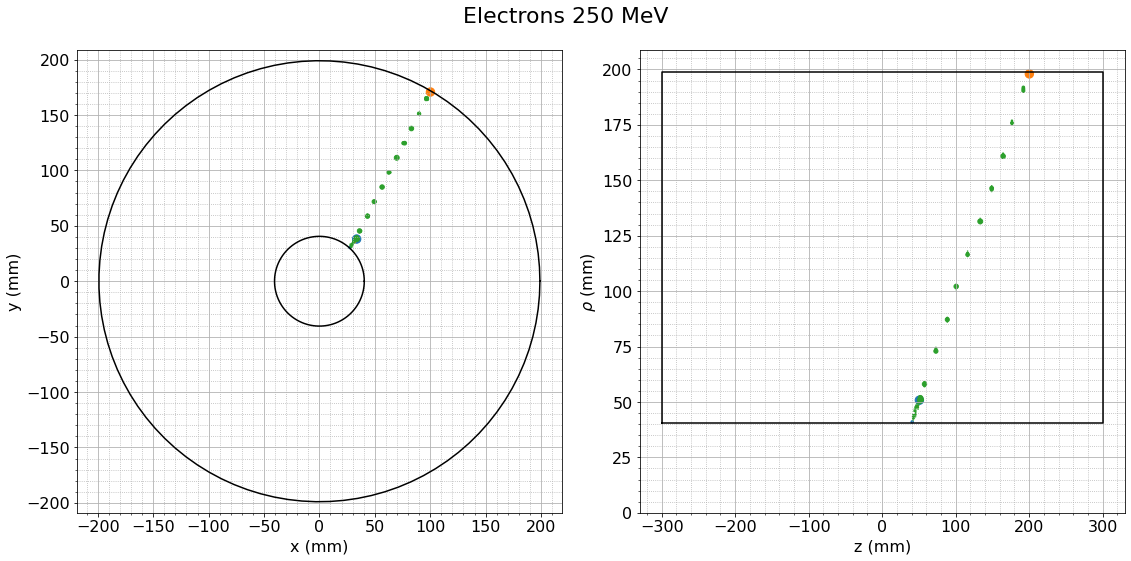

In [9]:
nevt = 1982
draw_g4xyz(pg4[nevt], pdigi[nevt], f'Electrons {energy} MeV')

In [10]:
clus = np.vstack(digits_to_clusters(pdigi[nevt])).T
perm = np.argsort(clus[:, 2])
clus = clus[perm]
# clus

In [11]:
%%time
mug4, mudigi = get_data(f'mu_{energy}.0', data_path, 2000)

CPU times: user 15.5 s, sys: 699 ms, total: 16.1 s
Wall time: 16.6 s


In [13]:
%%time
pig4, pidigi = get_data(f'pi_{energy}.0', data_path, 2000)

CPU times: user 19.5 s, sys: 273 ms, total: 19.8 s
Wall time: 20.4 s


In [15]:
%%time
kg4, kdigi = get_data(f'K_{energy}.0', data_path, 2000)

CPU times: user 51.2 s, sys: 492 ms, total: 51.7 s
Wall time: 51.8 s


In [15]:
list(map(len, [mug4, pig4, kg4]))

[2000, 2000, 2000]

## Event display

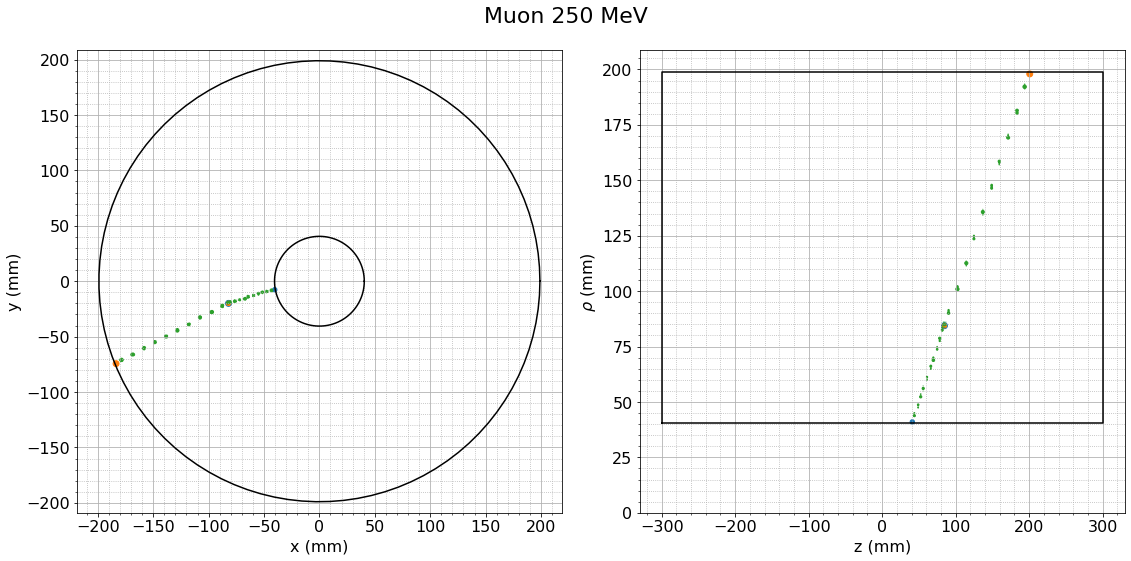

In [16]:
nevt = 46
draw_g4xyz(mug4[nevt], mudigi[nevt], f'Muon {energy} MeV')

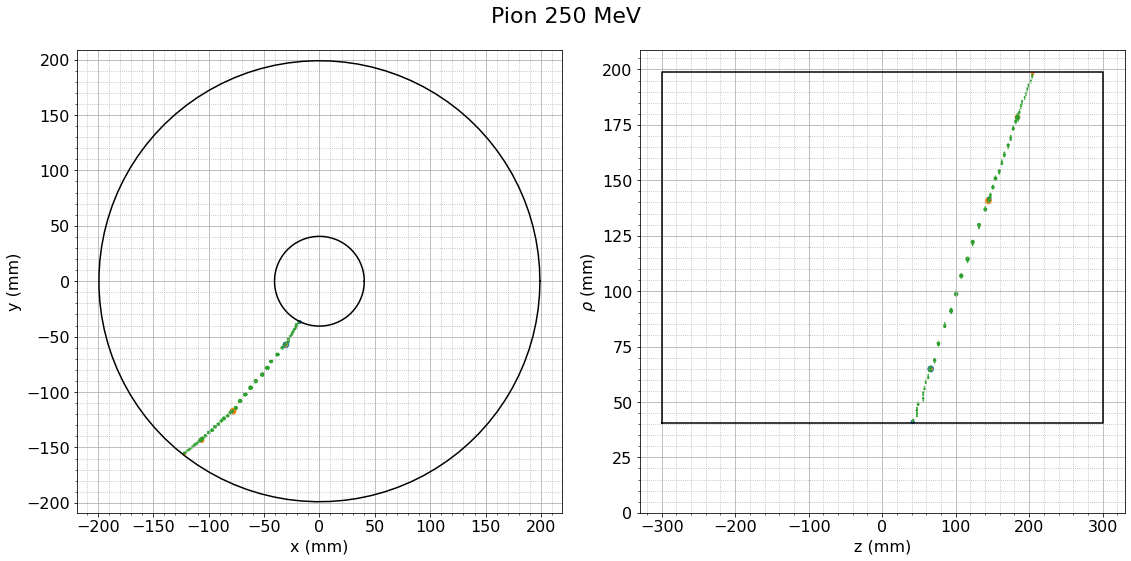

In [20]:
nevt = 20
draw_g4xyz(pig4[nevt], pidigi[nevt], f'Pion {energy} MeV')

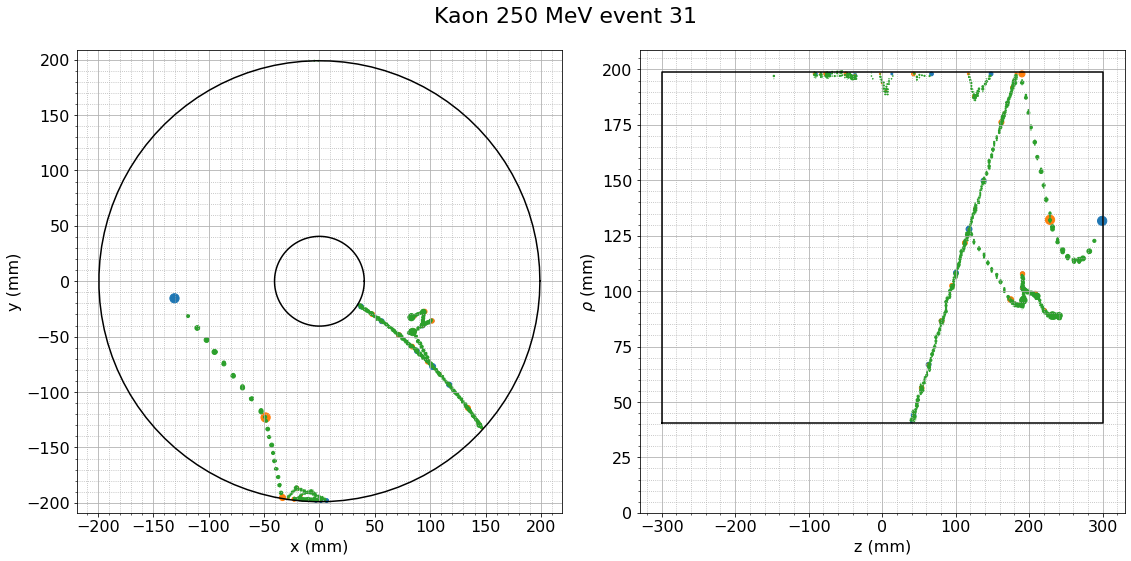

In [54]:
nevt = 32
draw_g4xyz(kg4[nevt], kdigi[nevt], f'Kaon {energy} MeV event {nevt}')
# plt.savefig('plots/event.png')

In [40]:
kdigi[nevt]

array([(3,  5865, 5.24468592e+04, 3025), (3,  6195, 9.22492988e+03, 3025),
       (3,  6195, 2.16402544e+05, 3075), (3,  6196, 2.30427095e+05, 3025),
       (3,  6196, 1.47919927e+04, 3075), (3,  6197, 1.69486549e+03, 3025),
       (3,  6525, 4.23375510e+03, 3075), (3,  6525, 2.83717898e+04, 3125),
       (3,  6526, 3.01958242e+05, 3075), (3,  6526, 5.06850307e+04, 3125),
       (3,  6527, 1.32519046e+03, 3025), (3,  6527, 1.49027560e+05, 3075),
       (3,  6855, 1.06562223e+04, 3175), (3,  6856, 1.16613763e+05, 3125),
       (3,  6856, 1.30337413e+05, 3175), (3,  6857, 4.41796748e+03, 3075),
       (3,  6857, 4.92494905e+04, 3125), (3,  6857, 1.38150860e+03, 3175),
       (3,  7185, 5.36714673e+04, 3225), (3,  7185, 1.33179736e+04, 3275),
       (3,  7186, 1.87787937e+05, 3175), (3,  7186, 1.65867212e+05, 3225),
       (3,  7186, 9.75450131e+04, 3275), (3,  7187, 2.83817531e+05, 3175),
       (3,  7187, 6.90520567e+03, 3225), (3,  7188, 1.12164039e+03, 3175),
       (3,  7515, 3.95503

In [41]:
from recoclusters import number_of_pads

In [42]:
number_of_pads()

109561

## Track fit

In [20]:
q, l, dEdx = process_track(kdigi[nevt])
q, l, dEdx

(254.45891311812633, 240.91162591255792, 1.0562334306376961)

In [21]:
q, l, dEdx = process_track(pidigi[nevt])
q, l, dEdx

(54.24461053270644, 231.45297202989795, 0.23436558216111128)

In [22]:
q, l, dEdx = process_track(mudigi[54])
q, l, dEdx

(54.74340017767985, 224.80418148848776, 0.24351593380162845)

In [23]:
def process_hits(digits):
    lengths, values, charge = [], [], []
    for evtn, digits in digits.items():
        q, l, dEdx = process_track(digits)
        if l < 250 and l > 210:
            values.append(dEdx)
            lengths.append(l)
            charge.append(q)
    print(f'{np.mean(values):.3f} +- {np.std(values):.3f}')
    return lengths, values, charge

In [24]:
kl, kv, kc = process_hits(kdigi)

0.829 +- 0.145


TypeError: can't multiply sequence by non-int of type 'float'

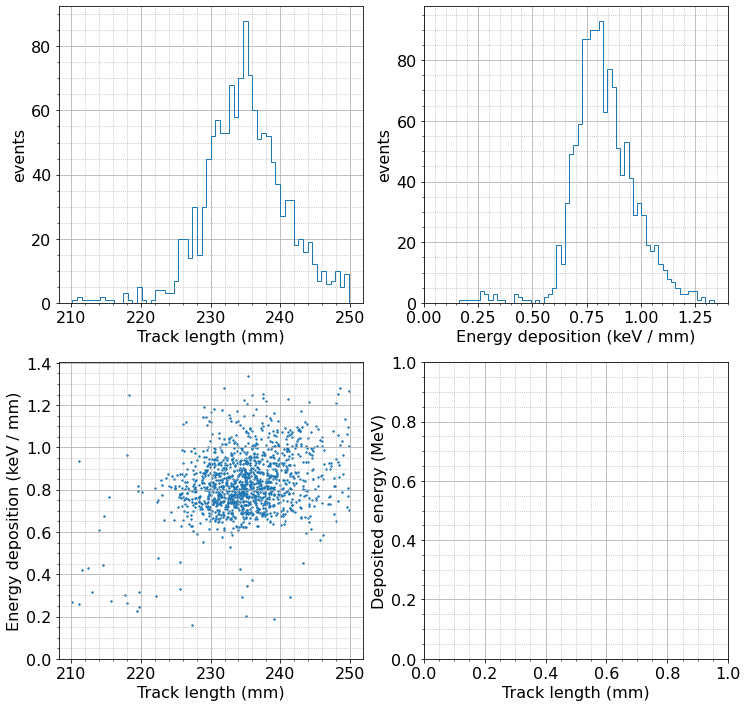

In [25]:
plot_dedx(kl, kv, kc)

In [ ]:
pil, piv, pic = process_hits(pidigi)

In [ ]:
plot_dedx(pil, piv, pic)

In [ ]:
mul, muv, muc = process_hits(mudigi)

In [ ]:
plot_dedx(mul, miv, muc)

In [ ]:
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.hist(kv, bins=100, range=(0, 1.5), histtype='step', label='$K$')
plt.hist(muv, bins=100, range=(0, 1.5), histtype='step', label=r'$\mu$')
plt.hist(piv, bins=100, range=(0, 1.5), histtype='step', label=r'$\pi$')
plt.legend()
plt.tight_layout()